In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

print("set done")

set done


In [13]:
df = pd.read_csv("ToyotaCorolla.csv")
print(df.head())

   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3  ?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ...  Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...             1   
1         10      2002  72937    Diesel  90          1  ...             1   
2          9      2002  41711    Diesel  90          1  ...             0   
3          7      2002  48000    Diesel  90          0  ...             0   
4          3      2002  38500    Diesel  90          0  ...             1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                

In [14]:
nCar=df.shape[0] # R의 nrow()
nVar=df.shape[1] # R의 ncol()

print(nCar,nVar) #행,열 개수 확인

1436 37


                Id         Price    Age_08_04    Mfg_Month     Mfg_Year  \
count  1436.000000   1436.000000  1436.000000  1436.000000  1436.000000   
mean    721.555014  10730.824513    55.947075     5.548747  1999.625348   
std     416.476890   3626.964585    18.599988     3.354085     1.540722   
min       1.000000   4350.000000     1.000000     1.000000  1998.000000   
25%     361.750000   8450.000000    44.000000     3.000000  1998.000000   
50%     721.500000   9900.000000    61.000000     5.000000  1999.000000   
75%    1081.250000  11950.000000    70.000000     8.000000  2001.000000   
max    1442.000000  32500.000000    80.000000    12.000000  2004.000000   

                  KM           HP    Met_Color    Automatic           cc  ...  \
count    1436.000000  1436.000000  1436.000000  1436.000000   1436.00000  ...   
mean    68533.259749   101.502089     0.674791     0.055710   1576.85585  ...   
std     37506.448872    14.981080     0.468616     0.229441    424.38677  ...   


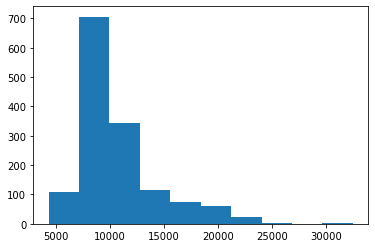

In [27]:
# dataset 변수별 기본 통계량 확인
print(df.describe())
plt.hist(df.Price)
plt.show()

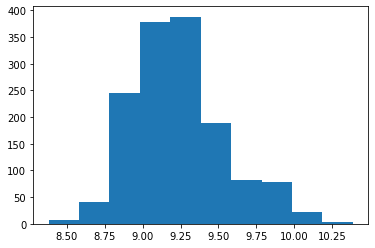

In [30]:
import math

df["log_Price"] = df["Price"].apply(math.log)
plt.hist(df.log_Price)
plt.show()

In [31]:
# Multi-variable Linear Regression 학습
import statsmodels.api as sm
import statsmodels.formula.api as smf

# OLS(Ordinary Least Squares) 잔차제곱합을 최소화 하는 계산식
res = smf.ols(formula='log_Price ~Age_08_04+KM+HP+Automatic+cc', data=df).fit()
# OLS 결과값 확인
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1361.
Date:                Fri, 07 May 2021   Prob (F-statistic):               0.00
Time:                        14:00:14   Log-Likelihood:                 966.90
No. Observations:                1436   AIC:                            -1922.
Df Residuals:                    1430   BIC:                            -1890.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6894      0.030    326.286      0.000       9.631       9.748
Age_08_04     -0.0121      0.000    -58.428      0.000      -0.013      -0.012
KM         -1.416e-06   1.09e-07    -13.032      0.000   -1.63e-06    -1.2e-06
HP             0.0027      0.000     11.488      0.000       0.002       0.003
Automatic      0.0582      0.014      4.043      0.000       0.030       0.086
cc          2.965e-05   7.91e-06      3.746      0.000    1.41e-05    4.52e-05
==============================================================================
Omnibus:                      157.563   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              615.429
Skew:                          -0.474   Prob(JB):                    2.30e-134
Kurtosis:                       6.064   Cond. No.                     7.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

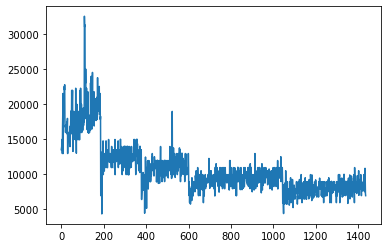

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


x = df[['Age_08_04','KM','HP','Automatic','cc']]
y1 = df['Price']
y2 = df['log_Price']


In [57]:
model.fit(x,y1)
pred = model.predict(x)
pred = pd.Series(pred)
print(type(y1), type(pred))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


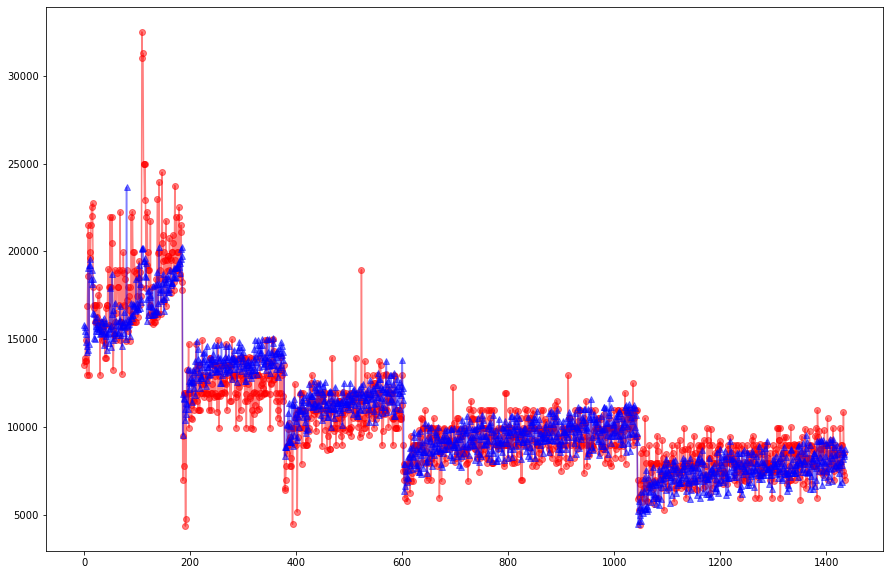

In [64]:
plt.figure(figsize=[15,10])
plt.plot(y1, marker='o',color='red',label="Price", alpha=0.5)
plt.plot(pred, marker='^', color='blue',label="Predicted", alpha = 0.5)
plt.show()